Лабораторная №4

1-2: Формируем DataFrame

In [1]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv("dataset.csv", sep=";")
df = df.rename(columns={"Absolute way": "absolute way"})
df = df.rename(columns={"Class": "class"})
df = df.drop(["Relative way"], axis=1)
print(df)

                     absolute way    class
0       D:/dataset/tiger/0000.jpg    tiger
1       D:/dataset/tiger/0001.jpg    tiger
2       D:/dataset/tiger/0002.jpg    tiger
3       D:/dataset/tiger/0003.jpg    tiger
4       D:/dataset/tiger/0004.jpg    tiger
...                           ...      ...
2195  D:/dataset/leopard/1095.jpg  leopard
2196  D:/dataset/leopard/1096.jpg  leopard
2197  D:/dataset/leopard/1097.jpg  leopard
2198  D:/dataset/leopard/1098.jpg  leopard
2199  D:/dataset/leopard/1099.jpg  leopard

[2200 rows x 2 columns]


3: Метка класса

In [3]:
def mark_class(row) -> int:
    """Mark for class"""
    mark = 1
    if row["class"] == "tiger":
        mark = 0
    return mark

df["mark"] = df.apply(mark_class, axis=1)
print(df)

                     absolute way    class  mark
0       D:/dataset/tiger/0000.jpg    tiger     0
1       D:/dataset/tiger/0001.jpg    tiger     0
2       D:/dataset/tiger/0002.jpg    tiger     0
3       D:/dataset/tiger/0003.jpg    tiger     0
4       D:/dataset/tiger/0004.jpg    tiger     0
...                           ...      ...   ...
2195  D:/dataset/leopard/1095.jpg  leopard     1
2196  D:/dataset/leopard/1096.jpg  leopard     1
2197  D:/dataset/leopard/1097.jpg  leopard     1
2198  D:/dataset/leopard/1098.jpg  leopard     1
2199  D:/dataset/leopard/1099.jpg  leopard     1

[2200 rows x 3 columns]


4: Добавляем столбцы с размерами изображений

In [5]:
def width(row) -> int:
    """Calculation width"""
    image = cv2.imread(row["absolute way"])
    w = image.shape[1]
    return w


def height(row) -> int:
    """Calculation height"""
    image = cv2.imread(row["absolute way"])
    h = image.shape[0]
    return h


def depth(row) -> int:
    """Calculation depth"""
    image = cv2.imread(row["absolute way"])
    d = image.shape[2]
    return d

df["height"] = df.apply(height, axis=1)
df["width"] = df.apply(width, axis=1)
df["depth"] = df.apply(depth, axis=1)
print(df)

                     absolute way    class  mark  height  width  depth
0       D:/dataset/tiger/0000.jpg    tiger     0     319    480      3
1       D:/dataset/tiger/0001.jpg    tiger     0     300    480      3
2       D:/dataset/tiger/0002.jpg    tiger     0     320    480      3
3       D:/dataset/tiger/0003.jpg    tiger     0     270    480      3
4       D:/dataset/tiger/0004.jpg    tiger     0     300    480      3
...                           ...      ...   ...     ...    ...    ...
2195  D:/dataset/leopard/1095.jpg  leopard     1     300    480      3
2196  D:/dataset/leopard/1096.jpg  leopard     1     320    324      3
2197  D:/dataset/leopard/1097.jpg  leopard     1     320    480      3
2198  D:/dataset/leopard/1098.jpg  leopard     1     319    480      3
2199  D:/dataset/leopard/1099.jpg  leopard     1     320    281      3

[2200 rows x 6 columns]


5: Статистика

In [6]:
st = df.describe()
print(st)

              mark       height        width   depth
count  2200.000000  2200.000000  2200.000000  2200.0
mean      0.500000   309.180909   449.937273     3.0
std       0.500114    16.610291    63.040526     0.0
min       0.000000   234.000000   168.000000     3.0
25%       0.000000   300.000000   443.000000     3.0
50%       0.500000   320.000000   480.000000     3.0
75%       1.000000   320.000000   480.000000     3.0
max       1.000000   320.000000   480.000000     3.0


6: Фильтрация по метке

In [7]:
def sort_mark(dframe, mark: int):
    """Filtering by class mark"""
    dframe = df[dframe.mark == mark]
    return dframe

s_mark = sort_mark(df, 0)
print(s_mark)

                   absolute way  class  mark  height  width  depth
0     D:/dataset/tiger/0000.jpg  tiger     0     319    480      3
1     D:/dataset/tiger/0001.jpg  tiger     0     300    480      3
2     D:/dataset/tiger/0002.jpg  tiger     0     320    480      3
3     D:/dataset/tiger/0003.jpg  tiger     0     270    480      3
4     D:/dataset/tiger/0004.jpg  tiger     0     300    480      3
...                         ...    ...   ...     ...    ...    ...
1095  D:/dataset/tiger/1095.jpg  tiger     0     319    480      3
1096  D:/dataset/tiger/1096.jpg  tiger     0     318    480      3
1097  D:/dataset/tiger/1097.jpg  tiger     0     273    480      3
1098  D:/dataset/tiger/1098.jpg  tiger     0     320    427      3
1099  D:/dataset/tiger/1099.jpg  tiger     0     270    480      3

[1100 rows x 6 columns]


7: Фильтрация по метке и размерам

In [8]:
def sort_par(dframe, mark, max_height, max_width):
    """Create new dataframe filtered by mark and size"""
    dframe = df[(dframe.mark == mark) & (dframe.height <= max_height) & (dframe.width <= max_width)]
    return dframe

s_par = sort_par(df, 1, 300, 480)
print(s_par)

                     absolute way    class  mark  height  width  depth
1100  D:/dataset/leopard/0000.jpg  leopard     1     300    480      3
1101  D:/dataset/leopard/0001.jpg  leopard     1     300    480      3
1109  D:/dataset/leopard/0009.jpg  leopard     1     270    480      3
1111  D:/dataset/leopard/0011.jpg  leopard     1     300    480      3
1115  D:/dataset/leopard/0015.jpg  leopard     1     300    480      3
...                           ...      ...   ...     ...    ...    ...
2185  D:/dataset/leopard/1085.jpg  leopard     1     240    480      3
2190  D:/dataset/leopard/1090.jpg  leopard     1     288    480      3
2191  D:/dataset/leopard/1091.jpg  leopard     1     300    480      3
2194  D:/dataset/leopard/1094.jpg  leopard     1     300    480      3
2195  D:/dataset/leopard/1095.jpg  leopard     1     300    480      3

[345 rows x 6 columns]


8: Группировка датафрейма

In [9]:
df["size"] = df["height"] * df["width"] * df["depth"]
result = df.groupby("mark").agg({"size": ["mean", "min", "max"]})
print(result)

               size                
               mean     min     max
mark                               
0     418175.127273  172800  460800
1     414545.454545  161280  460800


9: Построение гистограммы

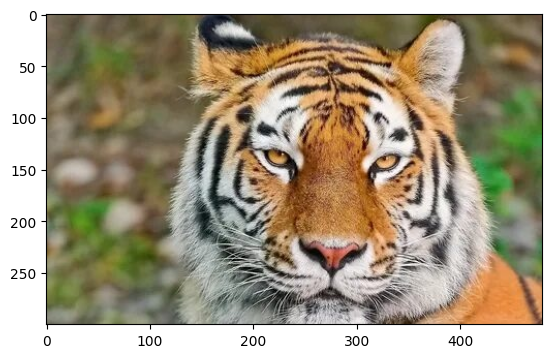

In [46]:
def histogram(dframe, mark: int) -> tuple:
    """Histogram"""
    random_numbers = list(range(0, 1100))
    random.shuffle(random_numbers)
    num = random.choice(random_numbers)
    n_df = df[df.mark == mark]['absolute way']
    img_path = n_df.iloc[num]
    image = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    list1 = []
    list2 = []
    list3 = []
    colours = (list1, list2, list3)
    for index in range(len(colours)):
        image_histogram = cv2.calcHist([image], [index], None, [256], [0,256])
        if index == 0:
            list1 = image_histogram
        if index == 1:
            list2 = image_histogram
        if index == 2:
            list3 = image_histogram
    return list1, list2, list3

h_1, h_2, h_3 = histogram(df, 0)


10: Отображение гистограммы

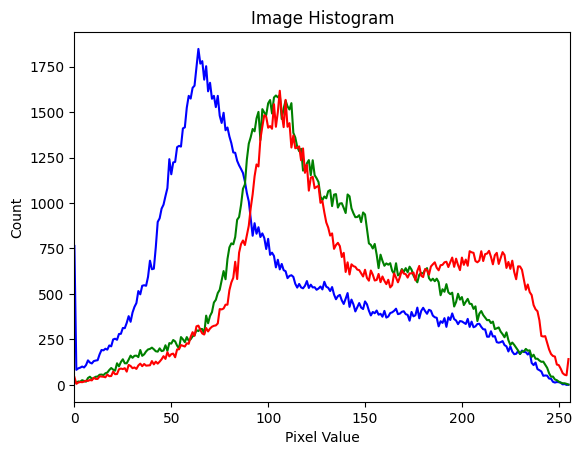

In [47]:
colors = {'b': h_1, 'g': h_2, 'r': h_3}
color = ('b', 'g', 'r')

for index, col in enumerate(color):
    plt.plot(colors[col], color=col)
    plt.xlim([0,256])
plt.title('Image Histogram')
plt.ylabel('Count')
plt.xlabel('Pixel Value')
plt.show()